In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.3)

57026/57026 [==============================] - 0s 0us/step


In [4]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [5]:
x_train.shape

(354, 13)

In [8]:

model = Sequential([
    Dense(units=64, activation="relu", input_dim=13),
    Dense(units=32, activation="relu"),
    Dense(units=1)
])

model.compile(optimizer="adam", loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
9/9 [==============================] - 0s 17ms/step - loss: 7.1640 - root_mean_squared_error: 2.6766 - val_loss: 25.4629 - val_root_mean_squared_error: 5.0461
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 7.1562 - root_mean_squared_error: 2.6751 - val_loss: 25.3565 - val_root_mean_squared_error: 5.0355
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 7.0828 - root_mean_squared_error: 2.6613 - val_loss: 25.2715 - val_root_mean_squared_error: 5.0271
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 7.0395 - root_mean_squared_error: 2.6532 - val_loss: 25.1102 - val_root_mean_squared_error: 5.0110
Epoch 5/100
9/9 [==============================] - 0s 13ms/step - loss: 7.0111 - root_mean_squared_error: 2.6478 - val_loss: 25.0973 - val_root_mean_squared_error: 5.0097
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 6.9969 - root_mean_squared_error: 2.6452 - val_loss: 25.1916 - val_root_me

In [15]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 14.7836 - root_mean_squared_error: 3.8449


[14.783588409423828, 3.8449432849884033]

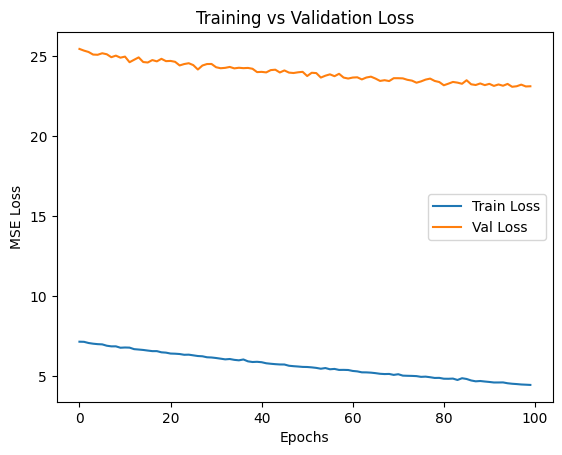

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()